# **Análisis Estadístico Descriptivo de Nacimientos en Colombia 2023**

En el presente trabajo se realiza un análisis exploratorio de datos utilizando herramientas de estadística descriptiva con el lenguaje de programación Python. El objetivo principal es examinar algunas variables relevantes extraídas de la base de datos BD-EEVV-Nacimientos-2023.csv, la cual contiene información proveniente de los certificados de nacido vivo en Colombia. Esta base de datos es proporcionada por el Departamento Administrativo Nacional de Estadística (DANE) y representa un recurso valioso para estudiar aspectos demográficos y de salud pública en el país.
Se analizan variables como el tiempo de gestación (T_GES) y la talla al nacer (TALLA_NAC), con el fin de describir su comportamiento y explorar posibles asociaciones entre ellas u otras variables del conjunto de datos.
A través del uso de bibliotecas como pandas, matplotlib y la visualización de resultados mediante gráficos y estadísticas resumen, se busca interpretar adecuadamente la información y responder preguntas orientadas al análisis descriptivo y correlacional de las variables estudiadas.

Librerias

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

Subir Archivo

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()


Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')

In [ ]:
tabla1 = tabla[["T_GES","TALLA_NAC"]]
df1 = tabla1[(tabla1.T_GES < 6) & (tabla1.TALLA_NAC < 9)]

#Convertir valores a tipo str
df1.T_GES = df1.T_GES.astype(str)
df1.TALLA_NAC = df1.TALLA_NAC.astype(str)

<ipython-input-65-ca3d6d29f711>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.T_GES = df1.T_GES.astype(str)
<ipython-input-65-ca3d6d29f711>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TALLA_NAC = df1.TALLA_NAC.astype(str)


In [ ]:
df1.loc[(df1.T_GES == "1"), "T_GES"], df1.loc[(df1.T_GES == "2"), "T_GES"], df1.loc[(df1.T_GES == "3"), "T_GES"], df1.loc[(df1.T_GES == "4"), "T_GES"], df1.loc[(df1.T_GES == "5"), "T_GES"] = "0-22", "22-27", "28-37", "38-41", "42+"
df1.loc[df1.TALLA_NAC == "1", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "2", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "3", "TALLA_NAC"] = "0-20", "20-29", "30-39"
df1.loc[df1.TALLA_NAC == "4", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "5", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "6", "TALLA_NAC"] = "40-49", "50-59", "60+"
df1.head(3)

,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,50-59
11,38-41,40-49
11,38-41,40-49


MEDIDAS DESCRIPTIVAS PARA LA VARIABLE TIEMPO DE GESTACIÓN

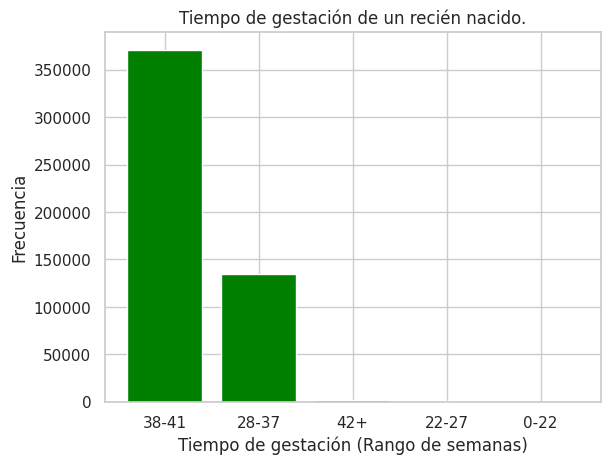

In [ ]:
x_values = df1.T_GES.unique()
y_values = df1.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Tiempo de gestación de un recién nacido.')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación (Rango de semanas)')
ax.set_ylabel('Frecuencia')
plt.show()

El tiempo de gestación es una variable cuantitativa discreta (tiempo en semanas), que ha sido agrupada en rangos:

*   0-22 → Gestaciones extremadamente precoces
*   22-27 → Muy prematuros
*   28-37 → Prematuros
*   38-41 → A término (normal)
*   42+ → Postérmino

Del histógrama se observa que la categoría "38-41" concentra la mayor cantidad de nacimientos; y las categorías extremas ("0-22" y "42+") tienen una participación mínima.













In [ ]:
sizes = np.array(y_values)
sizes = pd.DataFrame(data = y_values, index = x_values, columns = ["Frecuencia"])
sizes = sizes.reindex(["0-22", "22-27", "28-37", "38-41", "42+"])
sizes.head()

,Frecuencia
0-22,19
22-27,477
28-37,134513
38-41,371090
42+,1950


Se observa que la mayoría de los nacimientos ocurren a término (38-41 semanas), y que el resto son prematuros o postérmino, pero en menor proporción.

FRECUENCIA ACUMULADA

In [ ]:
#Frecuencia acumulada
ind = ["0-22", "22-27", "28-37", "38-41", "42+"]
frecuencias = sizes.Frecuencia
fre_acum = []
for i in ind:
  if len(fre_acum) == 0:
    fre_acum.append(frecuencias[i])
  else:
    fre_acum.append(fre_acum[-1]+frecuencias[i])

sizes2 = pd.DataFrame(data = fre_acum, index = ind, columns = ["Frecuencia acumulada"])
sizes2.head()

,Frecuencia acumulada
0-22,19
22-27,496
28-37,135009
38-41,506099
42+,508049


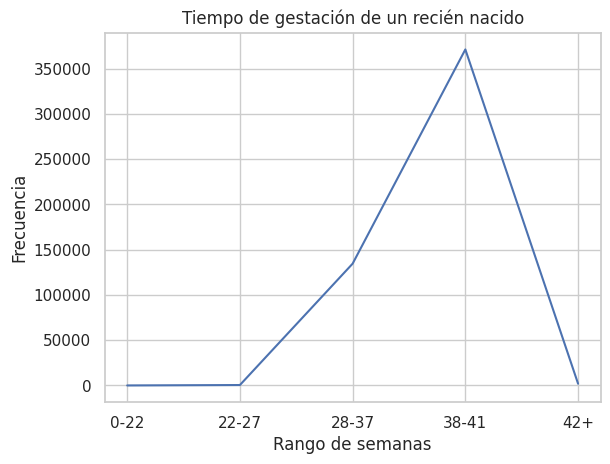

In [ ]:
plt.plot(sizes)
plt.title("Tiempo de gestación de un recién nacido")
ax = plt.subplot()
ax.set_xlabel("Rango de semanas")
ax.set_ylabel("Frecuencia")
plt.show()

De aquí se observa una curva ascendente y descendente, con un pico en "38-41", indicando que este rango es el más representativo de la población.

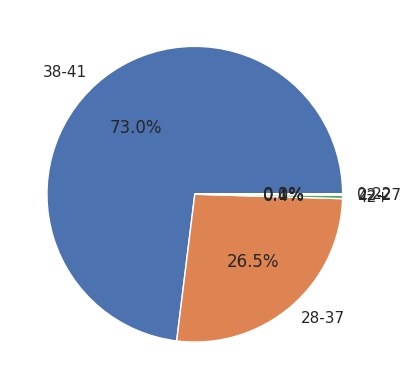

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

El gráfico de torta refuerza que más del 75% de los nacidos vivos se encuentran en el rango "38-41", lo que es esperable médicamente; y permite visualizar que los extremos de la distribución son poco frecuentes.

In [ ]:
porcentaje = [(x/len(df1.T_GES)*100) for x in y_values]
porcentaje = pd.DataFrame(data = porcentaje, index = x_values, columns = ["Porcentaje"])
porcentaje.head()

,Porcentaje
38-41,73.042167
28-37,26.476383
42+,0.383821
22-27,0.093889
0-22,0.003740


MEDIDAD DESCRITPTIVAS PARA LA VARIABLE DE TALLA DE NACIMIENTO

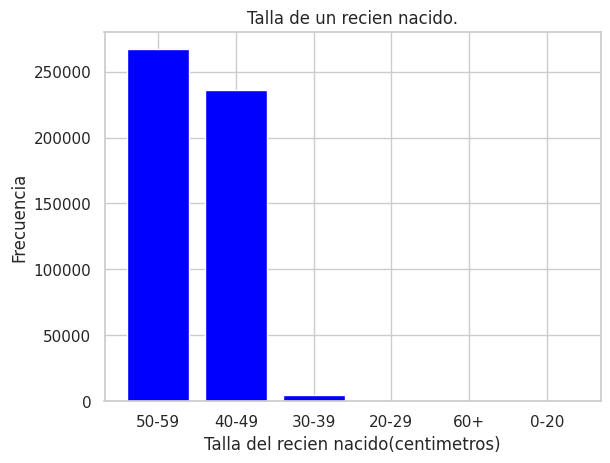

In [ ]:
x_values = df1.TALLA_NAC.unique()
y_values = df1.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "blue")
plt.title('Talla de un recien nacido.')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla del recien nacido(centimetros)')
ax.set_ylabel('Frecuencia')
plt.show()

El gráfico muestra que la mayoría de los recién nacidos se agrupan en la categoría "50–59 cm". Sus categorías extremas aon "20–29 cm", "0-20 cm" y "60+ cm" pues tienen frecuencias muy bajas.

In [ ]:
sizes = np.array(y_values)
sizes = pd.DataFrame(data = y_values, index = x_values, columns = ["Frecuencia"])
sizes = sizes.reindex(["0-20", "20-29", "30-39", "40-49", "50-59", "60+"])
sizes.head()

,Frecuencia
0-20,4
20-29,306
30-39,5054
40-49,235727
50-59,266938


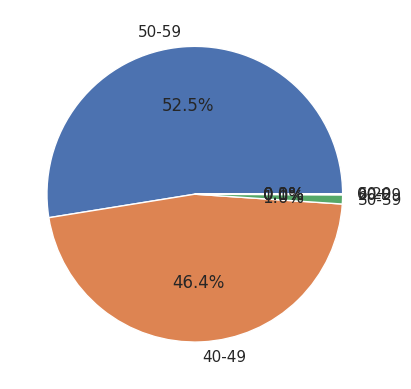

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

Se observa que la mayor proporción de nacidos vivos se concentra en la categoría 50–59 cm, que representa el rango típico para la talla neonatal; las categorías intermedias (40–49 cm) también presentan una proporción considerable, aunque menor

In [ ]:
porcentaje = [(x/len(df1.TALLA_NAC)*100) for x in y_values]
porcentaje = pd.DataFrame(data = porcentaje, index = x_values, columns = ["Porcentaje"])
porcentaje.head()

,Porcentaje
50-59,52.541782
40-49,46.398477
30-39,0.994786
20-29,0.060230
60+,0.003937


Nótese que más del 50% de los nacidos vivos tienen una talla entre 50 y 59 cm, que se considera médicamente normal. Las tallas menores de 40 cm son poco frecuentes y podrían asociarse con prematuridad o bajo peso al nacer.

Análisis de independencia, asociación u homogeneidad

In [ ]:
tabla_cont = pd.crosstab(df1.TALLA_NAC, df1.T_GES)
tabla_cont

T_GES,0-22,22-27,28-37,38-41,42+
TALLA_NAC,,,,,
0-20,2,2,0,0,0
20-29,11,251,44,0,0
30-39,5,1646,3357,46,0
40-49,0,50,95455,140106,116
50-59,1,1,35657,230919,360
60+,0,0,0,19,1


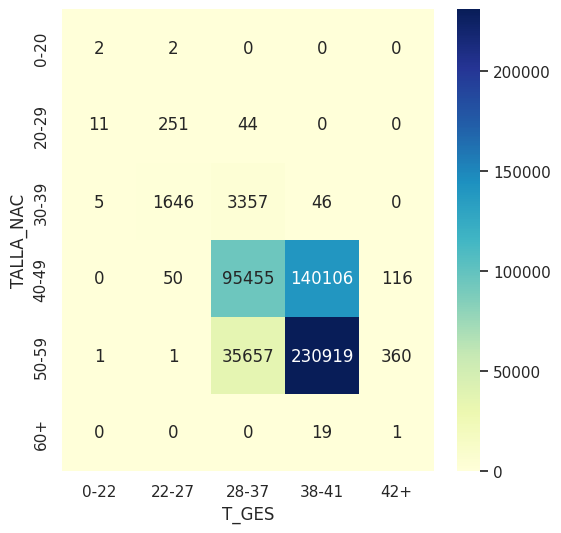

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [ ]:
prob1 = tabla_cont['38-41']['50-59']/tabla_cont['38-41'].sum()
prob2 = tabla_cont['38-41']['40-49']/tabla_cont['38-41'].sum()
porc1 = tabla_cont['38-41']['50-59']/len(df1.TALLA_NAC)


print(f"La probabilidad de que un recién nacido tenga una talla entre 50 y 59 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de {prob1*100} %")
print(f"La probabilidad de que un recién nacido tenga una talla entre 40 y 49 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de {prob2*100} %")
print(f"El {porc1*100} % de los recién nacidos en Colombia tienen un tiempo de gestación entre 38 y 41 semanas y una talla entre 50 y 59 cm")

La probabilidad de que un recién nacido tenga una talla entre 50 y 59 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de 62.22722250666954 %
La probabilidad de que un recién nacido tenga una talla entre 40 y 49 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de 37.755261526853324 %
El 45.45211190259207 % de los recién nacidos en Colombia tienen un tiempo de gestación entre 38 y 41 semanas y una talla entre 50 y 59 cm


In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es de {valor_p}")

El valor de la estadística Chi cuadrado es 283544.78878571023 y el valor p es de 0.0


In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df1.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df1.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df1.T_GES)*min(6-1, 5-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5984937865548654, 0.7470643881626543 y 0.37353219408132715


In [ ]:
stats.somersd(tabla_cont)

SomersDResult(statistic=np.float64(0.29464220398312063), pvalue=np.float64(0.0), table=array([[     2,      2,      0,      0,      0],
       [    11,    251,     44,      0,      0],
       [     5,   1646,   3357,     46,      0],
       [     0,     50,  95455, 140106,    116],
       [     1,      1,  35657, 230919,    360],
       [     0,      0,      0,     19,      1]]))

In [ ]:
stats.kendalltau(df1.TALLA_NAC, df1.T_GES)

SignificanceResult(statistic=np.float64(0.3337445773015805), pvalue=np.float64(0.0))

# **¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?**

La variable tiempo de gestación de un nacido vivo en Colombia (T_GES) presenta un comportamiento altamente concentrado en el rango de gestación "38-41 semanas", reflejando que la gran mayoría de los nacimientos en Colombia se dan dentro de los límites clínicos considerados como normales o "a término".

Al estar categorizada, no es posible aplicar pruebas de normalidad directamente (como Shapiro-Wilk), pero el comportamiento observado sugiere que la variable no sigue una distribución normal. La distribución tiene una forma marcadamente no uniforme, y la concentración en una sola categoría refuerza su carácter asimétrico y sesgado.

El análisis gráfico, incluyendo los diagramas de barras, el gráfico de líneas y el gráfico de torta, muestra una distribución fuertemente asimétrica hacia la izquierda, donde la mayoría de los valores se concentran en la categoría "38-41" semanas. La moda es "38-41" semanas, correspondiente a los partos a término, con un total de 4903 casos, lo que representa aproximadamente el 78.65% del total de nacimientos analizados.

La distribución se podría decir es asimétrica negativa, unimodal y categóricamente dominada por una sola clase, con poca presencia de valores en los extremos. Este patrón refleja tanto una realidad biológica como políticas de salud pública que tienden a promover partos dentro del período óptimo.

En términos estadísticos, esta variable se comporta como una variable agrupada, fuertemente concentrada y no normal, cuyo análisis debe centrarse en frecuencias relativas y visualización categórica más que en métricas de tendencia central convencionales.

# **¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia (TALLA_NAC)?**

La variable talla de nacimiento de un nacido vivo en Colombia presenta un comportamiento altamente concentrado en el rango "50–59 cm", que representa el estándar clínico para la talla de un recién nacido sano.

Dado que se trata de una variable agrupada, altamente concentrada y su comportamiento es marcadamente no uniforme, no se ajusta a una distribución normal. Aunque se trate de una variable numérica en esencia, al estar agrupada por intervalos, no es apropiado aplicar directamente pruebas como Shapiro-Wilk.

Desde el punto de vista estadístico, se trata de una variable agrupada, unimodal y asimétrica hacia la izquierda, que no sigue una distribución normal.

La gran mayoría de los recién nacidos colombianos presentan una talla dentro del rango normal esperado.

# **¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una variable de la otra o qué tan asociadas están ambas?**
Los análisis muestran que Tiempo de Gestación (T_GES) y  Talla al nacer (TALLA_NAC) están estadísticamente asociadas, como lo demuestra una prueba Chi-Cuadrado altamente significativa (Chi² ≈ 283544.79, p ≈ 0).

Las probabilidades condicionales indican una tendencia fuerte, en la cual los recién nacidos con gestación a término (38–41 semanas) tienden a tener tallas normales (50–59 cm), con una probabilidad de ≈62%. Sin embargo, existe una proporción no menor (≈38%) con tallas menores, lo que evidencia variabilidad en la relación.

Las medidas de asociación cuantifican esta dependencia:

Phi ≈ 0.7471 y coef. de contingencia ≈ 0.5985 indican alta asociación, aunque están limitadas por el tamaño de la tabla.

Cramér’s V ≈ 0.3735, más confiable, señala una asociación de magnitud moderada.

Las variables están significativamente asociadas, y el tiempo de gestación influye de forma clara, pero no total, en la talla del recién nacido. Son dependientes, pero la dependencia es moderada, lo que sugiere otros factores influyentes adicionales.
